# LSTM metrics
Model: LSTM

Dataset: Electricity

Here we attempt to replicate the results from deepar_metrics.ipynb and deepar_metrics_continued.ipynb. Can we find similar patterns of good and bad seeds using only the LSTM part of the DeepAR model?

In [1]:
import matplotlib.pyplot as plt

from src.metrics import *


In [2]:
experiment_path = "/home/dev/deepts/experiments/lstm/electricity"
exp = load_data(experiment_path + "/1B")

len(exp)

100

In [3]:
exp[0].head(10)

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,94.513896,200.350739,235.0,9.791667,8.031874,1.039352,1.994004,0.701880,NaN,41.574097,352.000097,0.875000,200.350745,0.875000,48.701393,0.875000
1,1.0,361.657308,435.971313,2499.0,104.125000,9.577165,1.896748,0.178999,0.163300,NaN,75.869931,763.267819,0.958333,435.971298,0.958333,108.674777,0.958333
2,2.0,3.414377,41.672623,190.0,7.916667,8.673073,0.200201,0.224556,0.198694,NaN,8.008046,75.010716,1.000000,41.672620,1.000000,8.334524,1.000000
3,3.0,4573.447917,1517.516968,10468.0,436.166667,48.398763,1.306436,0.151792,0.139845,NaN,52.257434,2625.017957,0.958333,1517.517029,0.958333,410.016101,0.958333
4,4.0,888.982015,641.639404,4087.0,170.291667,25.383302,1.053251,0.172629,0.154806,NaN,42.130020,1154.950955,1.000000,641.639420,1.000000,128.327884,1.000000
5,5.0,15486.700521,2795.539551,15654.0,652.250000,77.445100,1.504044,0.207749,0.182572,NaN,60.161746,5031.971082,1.000000,2795.539490,1.000000,559.107898,1.000000
6,6.0,6.858065,53.313538,359.0,14.958333,4.801951,0.462603,0.173732,0.153843,NaN,18.504126,88.028418,0.791667,53.313537,0.791667,18.598656,0.791667
7,7.0,27796.541667,3745.147705,22464.0,936.000000,90.294910,1.728202,0.179550,0.161159,NaN,69.128069,6741.265759,1.000000,3745.147644,1.000000,749.029529,1.000000
8,8.0,1955.012695,842.853271,4315.0,179.791667,39.300618,0.893596,0.216110,0.198713,NaN,35.743853,1074.062967,0.791667,842.853287,0.791667,611.643607,0.791667


### Differences in metrics between different seeds

In [4]:
report_experiment_results(exp)

Most occuring repetitions worst 10 (repetition, frequency): {58: 3, 36: 3, 75: 3, 60: 3, 64: 3, 0: 2, 72: 2, 61: 2, 65: 2, 14: 1, 28: 1, 3: 1, 98: 1, 56: 1, 78: 1, 31: 1}
Most occuring repetitions best 10 (repetition, frequency): {38: 2, 9: 2, 35: 2, 41: 2, 39: 2, 88: 2, 95: 2, 25: 2, 30: 2, 0: 1, 13: 1, 22: 1, 73: 1, 4: 1, 47: 1, 61: 1, 89: 1, 82: 1, 15: 1, 94: 1, 54: 1}
Total number of different repetitions present across metrics (highest): 16
Total number of different repetitions present across metrics (lowest): 21

(MSE) Highest value: 43032656.0
(MSE) Lowest value:  4310055.5
(MSE) Difference between highest and lowest: 38722600.0
(MSE) Difference between average error, 10 highest - 10 lowest: 22014744.0

(MASE) Highest value: 2.7039947509765625
(MASE) Lowest value:  0.8842151165008545
(MASE) Difference between highest and lowest error: 1.819779634475708
(MASE) Difference between the average error, 10 highest - 10 lowest: 1.3470797538757324

(MAPE) Highest value: 0.240455910563468

### The best and worst metric-value for all timeseries. Which repetitions are most common?

In [ ]:
metric = ["MAPE"]

In [5]:
exp_array = calculate_timeseries_means(exp, metric, 321)
exp_array.shape

(100, 321, 1)

In [6]:
exp[0].head(10)

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,94.513896,200.350739,235.0,9.791667,8.031874,1.039352,1.994004,0.701880,NaN,41.574097,352.000097,0.875000,200.350745,0.875000,48.701393,0.875000
321,0.0,136.810689,245.424713,264.0,11.000000,8.026991,1.273956,2.483149,0.799616,NaN,50.958220,359.257740,0.833333,245.424715,0.833333,131.591690,0.833333
642,0.0,132.754517,178.821274,284.0,11.833333,8.025109,0.928447,1.154332,0.569100,NaN,37.137868,238.772603,0.875000,178.821275,0.875000,118.869946,0.875000
963,0.0,77.822601,189.714386,189.0,7.875000,8.024132,0.985124,1.697398,0.824766,NaN,39.404965,282.944193,0.916667,189.714388,0.916667,96.484583,0.916667
1284,0.0,13.344767,67.444717,166.0,6.916667,8.019890,0.350403,0.864250,0.479348,NaN,14.016134,85.519453,0.666667,67.444714,0.666667,49.369975,0.666667
1605,0.0,10.256723,62.652599,154.0,6.416667,8.016509,0.325644,0.640416,0.425857,NaN,13.025745,83.102288,0.708333,62.652599,0.708333,42.202910,0.708333
1926,0.0,30.831530,80.208748,207.0,8.625000,8.010442,0.417209,0.524016,0.375523,NaN,16.688372,101.026442,0.791667,80.208744,0.791667,59.391046,0.791667
1,1.0,361.657308,435.971313,2499.0,104.125000,9.577165,1.896748,0.178999,0.163300,NaN,75.869931,763.267819,0.958333,435.971298,0.958333,108.674777,0.958333
322,1.0,568.144450,552.672119,2351.0,97.958333,9.571517,2.405889,0.240748,0.213527,NaN,96.235543,994.081461,0.958333,552.672073,0.958333,111.262686,0.958333


(array([64,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  1,  0,  1,
         0,  0, 15,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, 21,  0,  0,  0,  0,  0,  0,  0, 31,  0,  0, 99, 83,  0,  0,
         0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0]),
 array([53, 61,  0, 65, 64]))

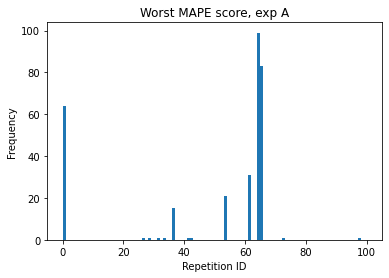

In [7]:
exp_max_bin, exp_worst_reps = find_n_most_frequent_repetitions(exp_array, 5, np.argmax)
plt.hist([i for i in range(100)], bins=100, range=(0, 100), weights=exp_max_bin)
plt.title(f"Worst {metric} score")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

exp_max_bin, exp_worst_reps

(array([ 1,  0,  0,  0,  0,  4,  2,  1,  1,  3,  0,  0,  1,  5,  2, 40,  0,
         2,  2,  1,  5,  2,  0,  7,  1,  5,  1,  1,  1,  2, 10,  1,  0,  0,
         2, 31,  0,  1,  3,  8,  1,  2,  9,  1,  0,  2,  0,  1,  0,  1,  1,
         0,  0,  7, 18,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  2,  4,  2,
         1,  0,  0,  1,  0,  2,  1,  0,  0,  1,  1,  1,  1,  1,  4,  3,  0,
         0, 11,  0, 48, 11,  0,  0,  0,  0,  3, 26,  0,  0,  2,  3]),
 array([54, 95, 88, 15, 35]))

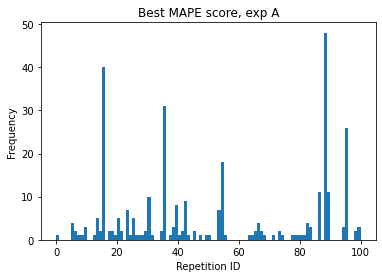

In [8]:
exp_min_bin, exp_best_reps = find_n_most_frequent_repetitions(exp_array, 5, np.argmin)
plt.hist([i for i in range(100)], bins=100, range=(0, 100), weights=exp_min_bin)
plt.title(f"Best {metric} score")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

exp_min_bin, exp_best_reps

### The top n best and worst scoring seeds

In [9]:
n = 10

(array([277.,   0.,   2.,  63.,   2.,  10.,   1.,   1.,   4.,   5.,   0.,
          0.,   0.,  52.,  34.,   0.,   1.,  23.,   2.,   8.,   0.,   0.,
         65.,   2.,  35.,   3.,  18.,   1.,  23.,   4.,   4., 153.,   2.,
          2.,   1.,   1., 263.,   1.,   8.,   1.,   1.,   1.,   3.,   0.,
          0.,   1.,   0.,  10.,   0.,  25.,   2.,   4.,   6., 106.,   2.,
          0.,   3.,   0., 172.,   1., 151., 246.,   0.,   0., 231., 291.,
          0.,  17.,   0.,   0.,  32.,   0., 266.,   0.,  16., 233.,   3.,
          0., 119.,   4.,   1.,   1.,   4.,  24.,   0.,   0.,   0.,   2.,
          0.,  70.,   0.,   2.,   2.,   0.,   0.,   0.,   0.,  63.,  21.,
          2.]),
 array([65,  0, 72, 36, 61, 75, 64, 58, 31, 60]),
 array([291., 277., 266., 263., 246., 233., 231., 172., 153., 151.]))

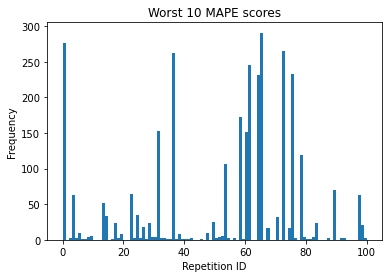

In [12]:
indexes_worst10, worst10 = np.unique(np.argsort(exp_array, axis=0)[-n:], return_counts=True)
worst_10_count = count_repetitions_among_top_n(indexes_worst10, worst10, 100)
plt.title(f"Worst 10 {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(100)], bins=100, range=(0, 100), weights=worst_10_count)

worst_10_count, np.argsort(worst_10_count)[-10:][::-1], worst_10_count[np.argsort(worst_10_count)[-10:][::-1]]

(array([  1.,  20.,   7.,   7.,  30.,  39.,  35.,  22.,  29.,  84.,  33.,
         23.,  22.,  16.,  28., 111.,  15.,  39.,  23.,   5.,  37.,  22.,
         14.,  56.,  11., 133.,   9.,  40.,  12.,  26., 124.,  13.,  12.,
         12.,  15., 166.,   3.,   2.,  76.,  97.,  46.,  82., 118.,  11.,
          8.,  16.,  47.,   9.,   9.,   6.,   6.,  22.,   5.,  27.,  93.,
         23.,   4.,  12.,   3.,   7.,  10.,   4.,   8.,  16.,   8.,   3.,
         68.,  15.,  16.,  12.,  14.,  22.,   5.,   9.,   8.,   2.,   6.,
         76.,   3.,  14.,  16.,   8., 108.,  43.,  34.,   1.,  90.,  32.,
        189.,  29.,  25.,  32.,  11.,  28.,  42., 138.,   8.,   1.,   6.,
         27.]),
 array([88, 35, 95, 25, 30, 42, 15, 82, 39, 54]),
 array([189., 166., 138., 133., 124., 118., 111., 108.,  97.,  93.]))

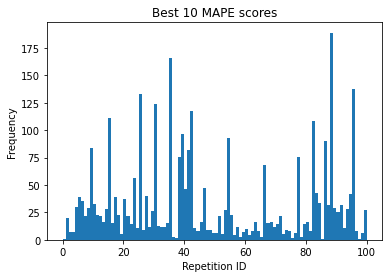

In [13]:
indexes_best10, best10 = np.unique(np.argsort(exp_array, axis=0)[:n], return_counts=True)
best_10_count = count_repetitions_among_top_n(indexes_best10, best10, 100)
plt.title(f"Best 10 {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(100)], bins=100, range=(0, 100), weights=best_10_count)

best_10_count, np.argsort(best_10_count)[-10:][::-1], best_10_count[np.argsort(best_10_count)[-10:][::-1]]